<a href="https://colab.research.google.com/github/YusolCho/NLPstudy/blob/main/NLP_Dacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **패키지, 데이터 로드**

In [1]:
#패키지 임포트 

# base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# regex
import re

# stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# tokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import TreebankWordTokenizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.text import text_to_word_sequence

# lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Vectorizer
import gensim
import urllib.request #*********
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#Padding 
from tensorflow.keras.preprocessing.sequence import pad_sequences

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

#DL
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Input

#scoring
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [2]:
#파일 불러오기 
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/train.csv'
data = pd.read_csv(filename,delimiter=',',index_col=0)# 첫번째 행을 index행으로

filename2 = '/content/drive/MyDrive/sample_submission.csv'
submission = pd.read_csv(filename2,delimiter=',',index_col=0)# 첫번째 행을 index행으로


Mounted at /content/drive


# **전처리(Preprocessing)**

## **노이즈 제거** 

In [3]:
#판다스 보는 옵션 설정 : col 최대너비 설정 
pd.set_option('max_colwidth', 220)
data.head()

# 복사본 생성 
data2 = data.copy()

#노이즈 제거

# 함수 지정 
def clean_text(texts): 
  corpus = [] 
  for i in range(0, len(texts)): 

    review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"\n\]\[\>]', '',texts[i]) #@%*=()/+ 와 같은 문장부호 제거
    review = re.sub(r'\d+','', review)#숫자 제거
    review = review.lower() #소문자 변환
    review = re.sub(r'\s+', ' ', review) #extra space 제거
    review = re.sub(r'<[^>]+>','',review) #Html tags 제거
    review = re.sub(r'\s+', ' ', review) #spaces 제거
    review = re.sub(r"^\s+", '', review) #space from start 제거
    review = re.sub(r'\s+$', '', review) #space from the end 제거
    review = re.sub(r'_', ' ', review) #space from the end 제거
    review = re.sub(r'"+', ' ', review) #spaces 제거
    review = re.sub('[^a-zA-Z]', ' ', review)    
    
    corpus.append(review) 
  
  return corpus

# 실행
data2_resub = clean_text(data2['text'])
data2['text'] = data2_resub
data2.head(20)

,text,author
index,,
0,he was almost choking there was so much so much he wanted to say but strange exclamations were all that came from his lips the pole gazed fixedly at him at the bundle of notes in his hand looked at odin and was in ev...,3
1,your sister asked for it i suppose,2
2,she was engaged one day as she walked in perusing jane s last letter and dwelling on some passages which proved that jane had not written in spirits when instead of being again surprised by mr odin she saw on looking...,1
3,the captain was in the porch keeping himself carefully out of the way of a treacherous shot should any be intended he turned and spoke to us doctors watch on the lookout dr odin take the north side if you please jim...,4
4,have mercy gentlemen odin flung up his hands don t write that anyway have some shame here i ve torn my heart asunder before you and you seize the opportunity and are fingering the wounds in both halves oh my god,3
5,it was well fought he said and by my sooth they will not charge us twice,4
6,not to pay him was impossible considering his character but i will talk about that fellow about that plague of mine another time,3
7,a proper figure of a man atarms said the little knight why man you are no chicken yet i warrant him the stronger man see to that great stone from the coping which hath fodin upon the bridge four of my lazy varlets...,2
8,you were not here last sunday night he said,0


## **토큰화, 정규화, 불용어제거** 

In [4]:
# 토큰화 : keras의 text_to_word_sequence를 이용해서 텍스트를 단어(혹은 토큰)의 시퀀스로 변환
data2['text'] = data2.apply(lambda row: text_to_word_sequence(row['text']), axis=1)

# 표제어 추출
data2['text'] = data2['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])

# Lemmatizer는 어근 형태로 돌리려고 하는 각 단어에 대한 언어적 부분을 알고 있거나 추측할 필요가 있다. 
# 이 경우 WordNetLemmatizer는 명사가 기본으로 설정되어 있지만 변경이 가능하다. 
# "pos" 파라미터를 지정하면 기본 설정 값을 덮어쓸 수 있다. 동사는 "v"로 하자.

# 불용어 제거 

# 불용어 리스트 생성 - NLTK english 불용어 사전 
stopwords_list = set(stopwords.words('english'))

# 불용어 리스트에 해당되는 단어 제거, 짧은 단어 제거 
data2['text'] = data2['text'].apply(lambda x: [word for word in x if word not in (stopwords_list)]) #불용어 제거
data2['text'] = data2['text'].apply(lambda x: [word for word in x if len(word) > 2]) #길이가 2이하인 단어 제거 



In [5]:
# 토큰화 완료된 문장을 판다스 시리즈에 저장
tokenized_docu = data2['text']
tokenized_docu   # 데이터프레임의 각 행에 저장된 리스트를 원소로 하는 판다스 시리즈 생성 

# 역토큰화
detokenized_doc = []  # 빈 리스트 생성
for i in range(len(data2)):     # i 범위를 데이터프레임의 행 개수로 설정   
    t = ' '.join(tokenized_docu[i])    # join함수로 문자열 합치기. 데이터 프레임의 각 행에 저장된 리스트는 문자열을 가지고 있음. 그걸 합쳐주기 
    detokenized_doc.append(t)     # 각각의 결과를 빈 리스트에 저장하기 

print(type(detokenized_doc)) # 리스트 형태이다. 
print(detokenized_doc[:5])    # 확인

data2['text'] = detokenized_doc    # data2['text']에 다시 저장


# 결과 확인
data2.head()

<class 'list'>
['almost choke much much want say strange exclamations come lips pole gaze fixedly bundle note hand look odin evident perplexity', 'sister ask suppose', 'engage one day walk peruse jane last letter dwell passages prove jane write spirit instead surprise odin saw look odin meet put away letter immediately force smile say', 'captain porch keep carefully way treacherous shoot intend turn speak doctor watch lookout odin take north side please jim east gray west watch hand load muskets lively men careful', 'mercy gentlemen odin fling hand write anyway shame tear heart asunder seize opportunity finger wound halve god']


,text,author
index,,
0,almost choke much much want say strange exclamations come lips pole gaze fixedly bundle note hand look odin evident perplexity,3
1,sister ask suppose,2
2,engage one day walk peruse jane last letter dwell passages prove jane write spirit instead surprise odin saw look odin meet put away letter immediately force smile say,1
3,captain porch keep carefully way treacherous shoot intend turn speak doctor watch lookout odin take north side please jim east gray west watch hand load muskets lively men careful,4
4,mercy gentlemen odin fling hand write anyway shame tear heart asunder seize opportunity finger wound halve god,3


In [7]:
# CountVectorizer 

#vectorizer = CountVectorizer()    # 객체 할당 
#vectorizer.fit(detokenized_doc)   # fit 의 역할은?
#vectorizer.vocabulary_    # vocabulary 의 역할은?

# TfidfVectorizer 

#tfidf_vectorizer = TfidfVectorizer()
#tfidf_vectorizer.fit(detokenized_doc) # 벡터라이저가 단어들을 학습
#tfidf_vectorizer.vocabulary_ # 벡터라이저가 학습한 단어사전을 출력
#sorted(tfidf_vectorizer.vocabulary_.items()) # 단어사전을 정렬

- https://manywisdom-career.tistory.com/59 아래 내용은 이 사이트 참고 

# **임베딩 + 모델링**

## **사전훈련 된 GloVe 를 이용한 임베딩**

- 정수인코딩 후 패딩

In [6]:
# 단어 집합 생성 + 정수인코딩 : using keras Tokenizer

tokenizer = Tokenizer() 
tokenizer.fit_on_texts(detokenized_doc) 
vocab_size = len(tokenizer.word_index) + 1 # 📌 패딩을 고려하여 +1 (0값)
print('단어 집합 : ', vocab_size)

# 정수 인코딩 

X_encoded = tokenizer.texts_to_sequences(detokenized_doc) 
max_len = max(len(l) for l in X_encoded)    # 가장 길이가 긴 문장의 길이 구하기(for padding)
print('최대길이 :', max_len)

단어 집합 :  36529
최대길이 : 203


In [7]:
# 패딩 진행 

X_pad = pad_sequences(X_encoded, maxlen=max_len, padding='post')
print('패딩 결과 :')
print(X_pad)

패딩 결과 :
[[  142  2679    24 ...     0     0     0]
 [  209    27   154 ...     0     0     0]
 [  547     3    61 ...     0     0     0]
 ...
 [ 2201 15041   119 ...     0     0     0]
 [   72  1900   165 ...     0     0     0]
 [  211   612     2 ...     0     0     0]]


- 사전훈련 모델 로드 후 모델 크기 확인하기 

In [8]:
# GloVe

from urllib.request import urlretrieve, urlopen
import gzip
import zipfile

urlretrieve("http://nlp.stanford.edu/data/glove.6B.zip", filename="glove.6B.zip")
zf = zipfile.ZipFile('glove.6B.zip')
zf.extractall() 
zf.close()

embedding_dict = dict()

f = open('glove.6B.100d.txt', encoding="utf8")

for line in f:
    word_vector = line.split()
    word = word_vector[0]

    # 100개의 값을 가지는 array로 변환
    word_vector_arr = np.asarray(word_vector[1:], dtype='float32')
    embedding_dict[word] = word_vector_arr
f.close()

print('%s개의 Embedding vector가 있습니다.' % len(embedding_dict))

400000개의 Embedding vector가 있습니다.


In [9]:
print('벡터의 차원 수 :',len(embedding_dict['odin']))

벡터의 차원 수 : 100


- 임베딩 행렬 만들고 크기 확인

In [10]:
# 임베딩 행렬 틀 짜기 

embedding_matrix = np.zeros((vocab_size, 100))

In [11]:
for word, index in tokenizer.word_index.items():
    # 단어와 맵핑되는 사전 훈련된 임베딩 벡터값
    vector_value = embedding_dict.get(word)
    if vector_value is not None:
        embedding_matrix[index] = vector_value

In [12]:
print('임베딩 행렬의 크기(shape) :',np.shape(embedding_matrix))

임베딩 행렬의 크기(shape) : (36529, 100)


## **모델링1**

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

output_dim = 100

model_1 = Sequential()
model_1.add(Input(shape=(max_len,), dtype='int32'))
e = Embedding(vocab_size, output_dim, weights=[embedding_matrix], input_length=max_len, trainable=False)
# trainable = False : 사전 훈련된 임베딩을 그대로 사용 (추가훈련 X)

model_1.add(e)
model_1.add(Dense(64, activation='relu'))
model_1.add(Flatten())
model_1.add(Dense(32, activation='relu'))
model_1.add(Dense(1, activation='softmax'))


model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

# model summary
print(model_1.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 203, 100)          3652900   
                                                                 
 dense (Dense)               (None, 203, 64)           6464      
                                                                 
 flatten (Flatten)           (None, 12992)             0         
                                                                 
 dense_1 (Dense)             (None, 32)                415776    
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,075,173
Trainable params: 422,273
Non-trainable params: 3,652,900
_________________________________________________________________
None


In [14]:
y_train = data2['author']

In [16]:
model_1.fit(X_pad, y_train, epochs = 4, verbose=2, validation_split = 0.2)

Epoch 1/4
1372/1372 - 26s - loss: 0.0000e+00 - acc: 0.1310 - val_loss: 0.0000e+00 - val_acc: 0.1340 - 26s/epoch - 19ms/step
Epoch 2/4
1372/1372 - 24s - loss: 0.0000e+00 - acc: 0.1310 - val_loss: 0.0000e+00 - val_acc: 0.1340 - 24s/epoch - 18ms/step
Epoch 3/4
1372/1372 - 21s - loss: 0.0000e+00 - acc: 0.1310 - val_loss: 0.0000e+00 - val_acc: 0.1340 - 21s/epoch - 15ms/step
Epoch 4/4
1372/1372 - 19s - loss: 0.0000e+00 - acc: 0.1310 - val_loss: 0.0000e+00 - val_acc: 0.1340 - 19s/epoch - 14ms/step


- 각 에포크별로 정확도를 봤을 때 전혀 학습이 안되고 있음 
- acc, val_acc 모두 낮음 
- 폐기

In [17]:
model_1.evaluate(X_pad, data2['author'])


1715/1715 [==============================] - 11s 6ms/step - loss: 0.0000e+00 - acc: 0.1316


[0.0, 0.1315986067056656]

- 모델 정확도 : 0.1316

## **모델링2**

In [18]:
# 파라미터 설정 
vocab_size = 36529
embedding_dim = 100
max_len = 203
padding_type='post'

# 모델 
model_2 = Sequential()

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, Input, Flatten, Concatenate

kernel_sizes = [2, 3, 5]
num_filters = 512
dropout_ratio = 0.5

model_input = Input(shape=(max_len,))
output = Embedding(vocab_size, embedding_dim, weights=[embedding_matrix],
                      input_length=max_len, trainable=False)(model_input)

conv_blocks = []

for size in kernel_sizes:
    conv = Conv1D(filters=num_filters,
                         kernel_size=size,
                         padding="valid",
                         activation="relu",
                         strides=1)(output)
    conv = GlobalMaxPooling1D()(conv)
    conv_blocks.append(conv)

output = Concatenate()(conv_blocks) if len(conv_blocks) > 1 else conv_blocks[0]
output = Dropout(dropout_ratio)(output)
model_output = Dense(5, activation='softmax')(output)
model_2 = Model(model_input, model_output)

model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
model_2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 203)]        0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 203, 100)     3652900     ['input_2[0][0]']                
                                                                                                  
 conv1d (Conv1D)                (None, 202, 512)     102912      ['embedding_1[0][0]']            
                                                                                                  
 conv1d_1 (Conv1D)              (None, 201, 512)     154112      ['embedding_1[0][0]']            
                                                                                              

In [19]:
y_train = np.array(data2['author'])

In [ ]:
history = model_2.fit(X_pad, y_train,
          batch_size=64,
          epochs=10,
          validation_split = 0.2)

Epoch 1/10
686/686 [==============================] - 460s 669ms/step - loss: 1.2808 - acc: 0.4748 - val_loss: 1.1027 - val_acc: 0.5597
Epoch 2/10
686/686 [==============================] - 458s 667ms/step - loss: 1.0582 - acc: 0.5789 - val_loss: 1.0250 - val_acc: 0.5921
Epoch 3/10
468/686 [===================>..........] - ETA: 2:13 - loss: 0.9400 - acc: 0.6317

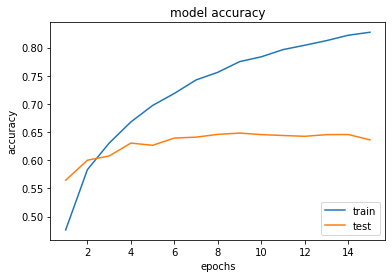

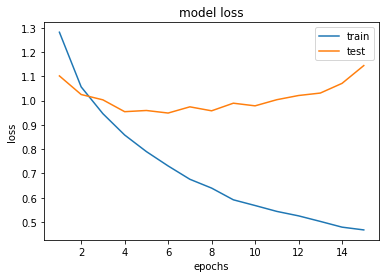

In [49]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['acc'])
plt.plot(epochs, history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

## **모델링3**

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

dropout_ratio = 0.3 # 드롭아웃 비율
num_filters = 256 # 커널의 수
kernel_size = 3 # 커널의 크기
hidden_units = 128 # 뉴런의 수

model_3 = Sequential()
model_3.add(e)
model_3.add(Dropout(dropout_ratio))
model_3.add(Conv1D(num_filters, kernel_size, padding='valid', activation='relu'))
model_3.add(GlobalMaxPooling1D())
model_3.add(Dense(hidden_units, activation='relu'))
model_3.add(Dropout(dropout_ratio))
model_3.add(Dense(1, activation='softmax'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [59]:
history = model_3.fit(X_pad, y_train, epochs=20, validation_split=0.2, callbacks=[es, mc])

Epoch 1/20
1371/1372 [============================>.] - ETA: 0s - loss: nan - acc: 0.2396
Epoch 1: val_acc improved from -inf to 0.24718, saving model to best_model.h5
1372/1372 [==============================] - 7s 4ms/step - loss: nan - acc: 0.2396 - val_loss: nan - val_acc: 0.2472
Epoch 2/20
1367/1372 [============================>.] - ETA: 0s - loss: nan - acc: 0.2395
Epoch 2: val_acc did not improve from 0.24718
1372/1372 [==============================] - 6s 5ms/step - loss: nan - acc: 0.2397 - val_loss: nan - val_acc: 0.2472
Epoch 3/20
1371/1372 [============================>.] - ETA: 0s - loss: nan - acc: 0.2397
Epoch 3: val_acc did not improve from 0.24718
1372/1372 [==============================] - 5s 4ms/step - loss: nan - acc: 0.2397 - val_loss: nan - val_acc: 0.2472
Epoch 3: early stopping


- 정확도가 개선 안되어 에포크 4에서 조기종료 
- max acc : 0.24718

## **사전훈련 된 Word2vec를 이용한 임베딩(ㅆ..)**

In [5]:
# 구글의 사전 훈련된 Word2Vec 모델을 로드, word2vec_model에 저장
import gensim
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7f6571127be0>)

- 자꾸 압축파일 안열림 ㅠ

In [6]:
word2vec_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

# 모델의 크기 확인
print('모델의 크기(shape) :',word2vec_model.vectors.shape) 

FileNotFoundError: ignored

- 포기....